# Proceso Poisson No Homogéneo

Recordemos que un Proceso Poisson No Homogéneo $\{N(t)\}_{t \geq 0}$  con intensidad $\lambda(t)$ cumple que:

$$ N(t+s) - N(t) \sim Poi (m(t+s) - m(t))$$

donde $m(t) = \displaystyle \int_0^t \lambda(x) dx$

En esta sección simularemos un Proceso Poisson No Homogéneo en un intervalo $[0,T]$ con intensidad acotada. Es decir, habrá $c \in \mathbb{R}$ tal que para todo $t \in [0,T]$, $\lambda(t) \leq c$

**Pseudo-Código para simular un Proceso Poisson No Homogéneo**

El objetivo es simular los tiempos de interocurrencia del Proceso Poisson No homogéneo.

1. Generamos los tiempos de interocurrencia $\{t_1, t_2, ...,t_N\}$ del Proceso Poisson homogéneo de tasa $c$ en el intervalo $[0,T]$.

2. Para cada $i \in \{1,...,N\}$, generamos $U_i \sim U(0,1)$.

3. Aceptamos $t_i$ como un salto del proceso no homogéneo si $U_i \leq \frac{\lambda(t_i)}{c}$.

**Ejemplo**

Simularemos un Proceso Poisson No Homogéneo con función de intensidad $\lambda(t) = \frac{1}{2}x+1$ en el intervalo $[0,10]$. Notemos que esta función está acotada por $0.5(10)+1 = 6$, entonces $c = 6$

Usaremos las clases que definimos antes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ProcesoPoisson:
  def __init__(self, lamb):
    '''
    lamb : tasa de ocurrencia del proceso
    self.proceso : dataframe con los tiempos de ocurrencia de cada evento
    self.pp_suma : dataframe con los tiempos de ocurrencia de la suma de los procesos
    self.pp1 : dataframe con los tiempos de ocurrencia del primer proceso (para sumar)
    self.pp2 : dataframe con los tiempos de ocurrencia del segundo proceso (para sumar)
    '''
    self.lamb = lamb
    self.proceso = pd.DataFrame()
    self.pp_suma = pd.DataFrame()
    self.pp1 = pd.DataFrame()
    self.pp2 = pd.DataFrame()

  # Simular con tiempos de interocurrencia
  def simular(self, t):
    llegadas = [0]
    while llegadas[-1] < t:
        ti = np.random.exponential(1 / self.lamb)
        llegadas.append(llegadas[-1] + ti)
    N = len(llegadas)
    self.proceso = pd.DataFrame({'n': range(N), 'T_n': llegadas})
    return self.proceso

  # Graficar el proceso Poisson
  def plot(self):
    plt.figure(figsize=(7, 4))
    for i in range(len(self.proceso['T_n']) - 1):
        # Línea horizontal
        plt.plot([self.proceso['T_n'][i], self.proceso['T_n'][i + 1]],
                  [self.proceso['n'][i], self.proceso['n'][i]], color='navy')
        # Línea vertical punteada
        plt.plot([self.proceso['T_n'][i + 1], self.proceso['T_n'][i + 1]],
                  [self.proceso['n'][i], self.proceso['n'][i + 1]], color='navy', linestyle='--')
    plt.scatter(self.proceso['T_n'], self.proceso['n'], color='blue', zorder=3, s=20)
    plt.title(f'Proceso Poisson de tasa {self.lamb}')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()
    plt.show()

  # Dividir el proceso en dos que sean su suma
  def sumandos(self, T, lamb1, lamb2):
    if lamb1 + lamb2 != self.lamb:
        raise Exception('Las tasas no coinciden')
    self.pp1 = ProcesoPoisson(lamb1)
    self.pp2 = ProcesoPoisson(lamb2)
    pp1_datos = self.pp1.simular(T // 2)
    pp2_datos = self.pp2.simular(T // 2)
    summ = list(pp1_datos['T_n']) + list(pp2_datos['T_n'])
    self.pp_suma = pd.DataFrame({'n': range(0, len(summ)), 'T_n': sorted(summ)})
    return self.pp_suma

  # Función auxiliar para graficar la suma
  def _graficar_proceso(self, df, color_linea, color_punto, label):
    for i in range(len(df['T_n']) - 1):
        plt.plot([df['T_n'][i], df['T_n'][i + 1]], [df['n'][i], df['n'][i]], color=color_linea, label=label if i == 0 else None)
        plt.plot([df['T_n'][i + 1], df['T_n'][i + 1]], [df['n'][i], df['n'][i + 1]], color=color_linea, linestyle='--')
    plt.scatter(df['T_n'], df['n'], color=color_punto, zorder=3, s=20)

  # Graficas la suma
  def plot_suma(self):
    plt.figure(figsize=(7, 4))
    self._graficar_proceso(self.pp1.proceso, color_linea='navy', color_punto='blue', label='pp1')
    self._graficar_proceso(self.pp2.proceso, color_linea='red', color_punto='purple', label='pp2')
    self._graficar_proceso(self.pp_suma, color_linea='green', color_punto='lime', label='pp1+pp2')
    plt.title('Suma de Procesos Poisson')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.legend()
    plt.grid()
    plt.show()

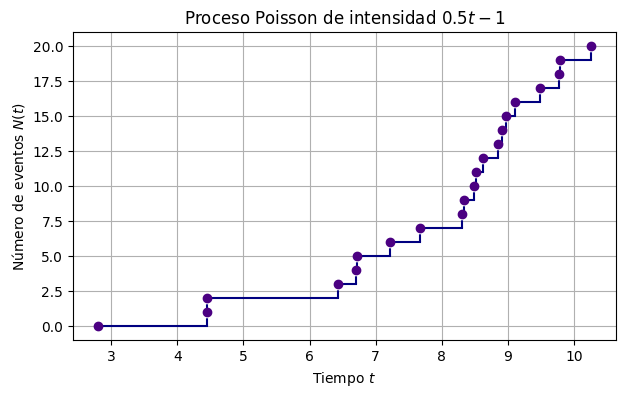

In [2]:
ppnh1 = ProcesoPoisson(6)
saltosh1 = list(ppnh1.simular(10)['T_n'])
saltosnh1 = []

def intensidad(t):
  return 0.5*t-1

for t in saltosh1:
  U = np.random.uniform(0,1)
  if U <= intensidad(t)/4:
    saltosnh1.append(t)

ppnh1.proceso = pd.DataFrame({'n':range(len(saltosnh1)), 'T_n':saltosnh1})
plt.figure(figsize=(7,4))
for i in range(len(ppnh1.proceso['T_n'])-1):
    # Línea horizontal
    plt.plot([ppnh1.proceso['T_n'][i], ppnh1.proceso['T_n'][i+1]], [ppnh1.proceso['n'][i], ppnh1.proceso['n'][i]], color='navy')

    # Línea vertical punteada (si no es la última)
    if i < len(ppnh1.proceso['n']) - 1:
        plt.plot([ppnh1.proceso['T_n'][i+1], ppnh1.proceso['T_n'][i+1]], [ppnh1.proceso['n'][i], ppnh1.proceso['n'][i+1]], color='navy', linestyle='--')

plt.scatter(ppnh1.proceso['T_n'], ppnh1.proceso['n'], color='indigo', zorder=3)
plt.title(f'Proceso Poisson de intensidad $0.5t-1$')
plt.xlabel('Tiempo $t$')
plt.ylabel('Número de eventos $N(t)$')
plt.grid()

Ahora veamos un ejemplo donde la función de intensidad tenga comportamientos diferentes dependiendo del intervalo.

**Ejemplo**

Supongamos que la llegada de personas a cierto lugar (que abre de 0 a 15 horas) sigue un Proceso Poisson No Homogéneo con la siguiente función de intensidad.

$$
\lambda(t) =
\begin{cases}
1, & \text{si } 0 \leq t < 3 \\[6pt]
5 + \sin(2\pi t), & \text{si } 3 \leq t < 6 \\[6pt]
8 - t, & \text{si } 6 \leq t < 8 \\[6pt]
0, & \text{si } 8 \leq t < 10 \\[6pt]
3 + 2\sin\left( \dfrac{\pi t}{2} \right), & \text{si } 10 \leq t \leq 15
\end{cases}
$$

Generaremos trayectorias para este Proceso Poisson No Homogéneo.

Observa que $8$ es una cota para esta función, entonces será nuestra $c$.


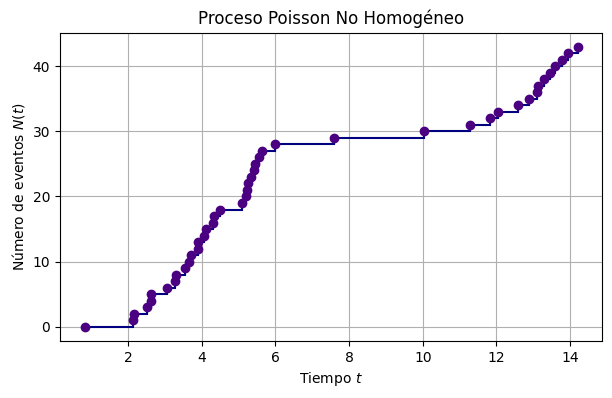

In [3]:
ppnh2 = ProcesoPoisson(8)
saltosh2 = list(ppnh2.simular(15)['T_n'])
saltosnh2 = []

def intensidad2(t):
  if t >= 0 and t < 3:
    return 1
  elif t >= 3 and t < 6:
    return 5 + np.sin(2*np.pi*t)
  elif t >= 6 and t < 8:
    return 8 - t
  elif t >= 8 and t < 10:
    return 0
  elif t >= 10 and t <= 15:
    return 3 + 2*np.sin(np.pi*t/2)
  else:
    return 0

for t in saltosh2:
  U = np.random.uniform(0,1)
  if U <= float(intensidad2(t))/8:
    saltosnh2.append(t)

ppnh2.proceso = pd.DataFrame({'n':range(len(saltosnh2)), 'T_n':saltosnh2})
plt.figure(figsize=(7,4))
for i in range(len(ppnh2.proceso['T_n'])-1):
    # Línea horizontal
    plt.plot([ppnh2.proceso['T_n'][i], ppnh2.proceso['T_n'][i+1]], [ppnh2.proceso['n'][i], ppnh2.proceso['n'][i]], color='navy')

    # Línea vertical punteada (si no es la última)
    if i < len(ppnh2.proceso['n']) - 1:
        plt.plot([ppnh2.proceso['T_n'][i+1], ppnh2.proceso['T_n'][i+1]], [ppnh2.proceso['n'][i], ppnh2.proceso['n'][i+1]], color='navy', linestyle='--')

plt.scatter(ppnh2.proceso['T_n'], ppnh2.proceso['n'], color='indigo', zorder=3)
plt.title(f'Proceso Poisson No Homogéneo')
plt.xlabel('Tiempo $t$')
plt.ylabel('Número de eventos $N(t)$')
plt.grid()

Ahora haremos una clase para simular un Proceso Poisson No Homogéneo

In [4]:
import numpy as np
import pandas as pd

class ProcesoPoissonNoHomogeneo:

  def __init__(self, intensidad, cota):
    """
    intensidad: función lambda(t), definida para t >= 0
    cota: valor tal que lambda(t) <= cota para todo t en el intervalo de simulación
    """
    self.intensidad = intensidad
    self.cota = cota
    self.proceso = None

  def simular(self, t_max):
    # Inicializamos el proceso
    t = 0
    Th_n = []
    pph = ProcesoPoisson(self.cota)
    saltosh = list(pph.simular(t_max)['T_n'])

    # Generamos tiempo con Aceptación-Rechazo
    for t in saltosh:
      U = np.random.uniform(0,1)
      if U <= self.intensidad(t)/self.cota:
        Th_n.append(t)

    # Guardar el resultado como DataFrame
    self.proceso = pd.DataFrame({'n': range(len(Th_n)), 'T_n': Th_n})
    return self.proceso

  def graficar(self):
    plt.figure(figsize=(7,4))
    for i in range(len(self.proceso['T_n'])-1):
        # Línea horizontal
        plt.plot([self.proceso['T_n'][i], self.proceso['T_n'][i+1]], [self.proceso['n'][i], self.proceso['n'][i]], color='navy')

        # Línea vertical punteada (si no es la última)
        if i < len(self.proceso['n']) - 1:
            plt.plot([self.proceso['T_n'][i+1], self.proceso['T_n'][i+1]], [self.proceso['n'][i], self.proceso['n'][i+1]], color='navy', linestyle='--')

    plt.scatter(self.proceso['T_n'], self.proceso['n'], color='indigo', zorder=3)
    plt.title(f'Proceso Poisson No Homogéneo')
    plt.xlabel('Tiempo $t$')
    plt.ylabel('Número de eventos $N(t)$')
    plt.grid()

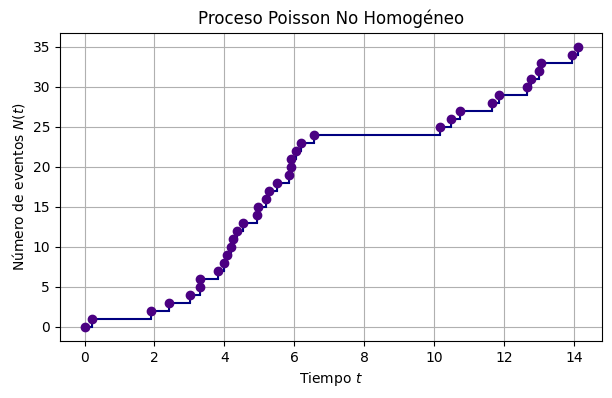

In [5]:
ppnh3 = ProcesoPoissonNoHomogeneo(intensidad2, 8)
ppnh3.simular(15)
ppnh3.graficar()

**Ejemplos**

¿Qué pasa si la intensidad es $\lambda(t) = t^n$? Veamos algunos resultados de este estilo.

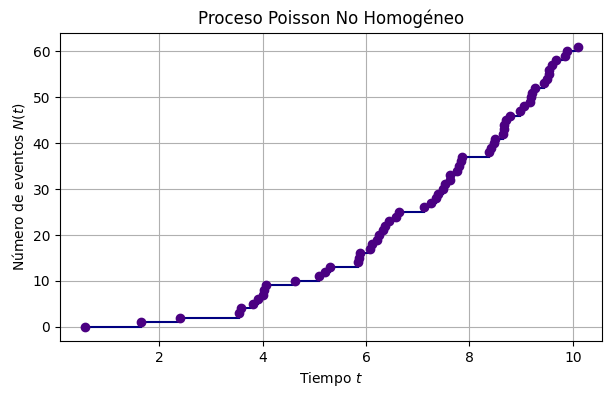

In [6]:
ppn4 = ProcesoPoissonNoHomogeneo(lambda t: t, 10)
ppn4.simular(10)
ppn4.graficar()

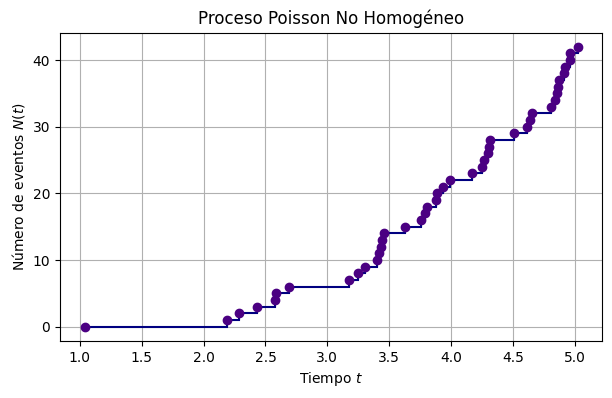

In [7]:
ppn5 = ProcesoPoissonNoHomogeneo(lambda t: t**2, 5**2)
ppn5.simular(5)
ppn5.graficar()

# Ejemplo Aplicado

El Museo de Historia Natural abre de 9:00 a 18:00 horas. Se sabe que la llegada de visitantes varía a lo largo del día y se puede modelar mediante un Proceso de Poisson no homogéneo con la siguiente función de intensidad, expresada en visitantes por hora:

$$
\lambda(t) =
\begin{cases}
2, & 0 \leq t < 2 \quad \text{(de 9 a 11 a.m.)} \\
3, & 2 \leq t < 4 \quad \text{(de 11 a 1 p.m.)} \\
15, & 4 \leq t < 6 \quad \text{(de 1 a 3 p.m.)} \\
1, & 6 \leq t < 9 \quad \text{(de 3 a 6 p.m.)}
\end{cases}
$$

donde $t$ está medido en horas desde la apertura (es decir, $t=0$ corresponde a las 9:00 a.m. y $t=9$ a las 6:00 p.m.).

Preguntas:
---

#### 1. **Interpretación**
- ¿Por qué crees que la intensidad aumenta hasta la 1 p.m. y luego disminuye?
- ¿Cuál es el periodo de mayor afluencia? Justifica con base en la función de intensidad.

#### 2. **Simulación**

Simula una trayectoria del proceso durante el horario del museo. ¿Qué valor funciona como cota para la intensidad?

#### 3. **Análisis**
- ¿Cuál es el número esperado de visitantes en todo el día?
- ¿Cuál es la probabilidad de que lleguen más de 100 personas entre las 11:00 y las 15:00 horas?

#### 4. **Visualización**

Grafica la intensidad $\lambda(t)$ y una trayectoria del proceso.


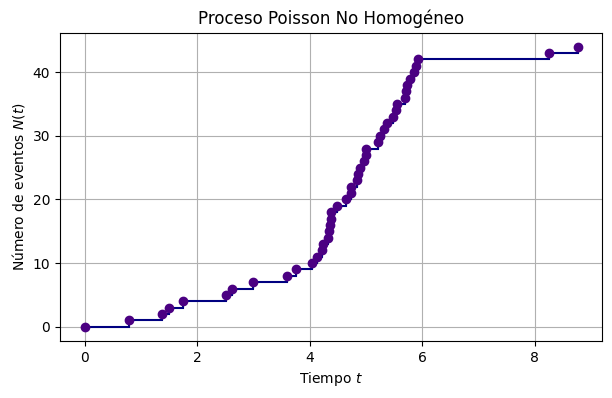

In [41]:
# Definimos la intensidad
def intensidad_museo(t):
  if 0 <= t < 2:
    return 2
  elif 2 <= t < 4:
    return 3
  elif 4 <= t < 6:
    return 15
  elif 6 <= t < 9:
    return 1
  else:
    return 0

# Generamos el proceso, lo simulamos y graficamos
museo = ProcesoPoissonNoHomogeneo(intensidad_museo, 15)
museo.simular(9)
museo.graficar()

Calcularemos el número esperado de visitantes en todo el día usando el método de Monte Carlo.

In [40]:
# Definimos un número de trayectorias
trayectorias = 1000

# Generamos procesos y los simulamos
procesos = [ProcesoPoissonNoHomogeneo(intensidad_museo, 15) for _ in range(trayectorias)]
for i in range(trayectorias):
  procesos[i].simular(9)

# Calculamos el número de visitantes por trayectoria
num_visitantes = [len(procesos[i].proceso) for i in range(trayectorias)]
num_esperado = sum(num_visitantes)/len(num_visitantes)

# Imprimos la aproximación de la esperanza
print('Aproximación de la esperanza:', num_esperado)

Aproximación de la esperanza: 43.29


Por tanto, aproximadamente tendremos 43 visitantes por día.